In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("uber_trips_dataset_50k.csv")

In [4]:
df.head()

,trip_id,driver_id,rider_id,city,pickup_lat,pickup_lng,drop_lat,drop_lng,distance_km,fare_amount,status,payment_method,pickup_time,drop_time
0,1,8270,10683,San Francisco,37.170931,-77.586479,37.173652,-77.619934,2.97,10.71,Completed,Wallet,2023-01-01 00:00:00,2023-01-01 00:08:54.600000000
1,2,1860,44743,Boston,38.898127,-108.582977,38.937464,-108.558727,8.43,22.41,Completed,UPI,2023-01-01 00:01:00,2023-01-01 00:26:17.400000000
2,3,6390,75839,San Francisco,38.814571,-89.942603,38.821702,-89.896435,5.46,12.91,Completed,Cash,2023-01-01 00:02:00,2023-01-01 00:18:22.800000000
3,4,6191,22189,New York,37.295906,-75.328844,37.301375,-75.317488,6.61,15.70,Completed,Wallet,2023-01-01 00:03:00,2023-01-01 00:22:49.800000000
4,5,6734,61104,Seattle,38.972395,-121.482913,38.992088,-121.467904,10.50,19.15,Completed,Wallet,2023-01-01 00:04:00,2023-01-01 00:35:30.000000000


In [5]:
df.describe()

,trip_id,driver_id,rider_id,pickup_lat,pickup_lng,drop_lat,drop_lng,distance_km,fare_amount
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,5493.954540,55040.994580,38.998664,-97.485552,38.998768,-97.485677,7.008070,15.976205
std,14433.901067,2601.410798,25915.467105,1.155241,14.173744,1.155696,14.173735,2.946744,6.274406
min,1.000000,1000.000000,10001.000000,37.000009,-121.999465,36.953365,-122.047124,0.000000,1.080000
25%,12500.750000,3232.750000,32539.000000,37.994428,-109.818282,37.998237,-109.817260,4.980000,11.510000
50%,25000.500000,5497.000000,55164.000000,38.992589,-97.463042,38.994190,-97.464646,6.980000,15.430000
75%,37500.250000,7746.000000,77293.500000,39.999602,-85.190954,39.998849,-85.199652,9.000000,19.910000
max,50000.000000,9998.000000,99998.000000,40.999937,-73.001961,41.047536,-72.963476,19.410000,50.670000


In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   trip_id         50000 non-null  int64  
 1   driver_id       50000 non-null  int64  
 2   rider_id        50000 non-null  int64  
 3   city            50000 non-null  object 
 4   pickup_lat      50000 non-null  float64
 5   pickup_lng      50000 non-null  float64
 6   drop_lat        50000 non-null  float64
 7   drop_lng        50000 non-null  float64
 8   distance_km     50000 non-null  float64
 9   fare_amount     50000 non-null  float64
 10  status          50000 non-null  object 
 11  payment_method  50000 non-null  object 
 12  pickup_time     50000 non-null  object 
 13  drop_time       50000 non-null  object 
dtypes: float64(6), int64(3), object(5)
memory usage: 5.3+ MB


trip_id           0
driver_id         0
rider_id          0
city              0
pickup_lat        0
pickup_lng        0
drop_lat          0
drop_lng          0
distance_km       0
fare_amount       0
status            0
payment_method    0
pickup_time       0
drop_time         0
dtype: int64

In [7]:
df.shape

(50000, 14)

In [8]:
df.columns.tolist()

['trip_id',
 'driver_id',
 'rider_id',
 'city',
 'pickup_lat',
 'pickup_lng',
 'drop_lat',
 'drop_lng',
 'distance_km',
 'fare_amount',
 'status',
 'payment_method',
 'pickup_time',
 'drop_time']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   trip_id         50000 non-null  int64  
 1   driver_id       50000 non-null  int64  
 2   rider_id        50000 non-null  int64  
 3   city            50000 non-null  object 
 4   pickup_lat      50000 non-null  float64
 5   pickup_lng      50000 non-null  float64
 6   drop_lat        50000 non-null  float64
 7   drop_lng        50000 non-null  float64
 8   distance_km     50000 non-null  float64
 9   fare_amount     50000 non-null  float64
 10  status          50000 non-null  object 
 11  payment_method  50000 non-null  object 
 12  pickup_time     50000 non-null  object 
 13  drop_time       50000 non-null  object 
dtypes: float64(6), int64(3), object(5)
memory usage: 5.3+ MB


In [10]:
df['pickup_time']=pd.to_datetime(df['pickup_time'])
df['drop_time']=pd.to_datetime(df['drop_time'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   trip_id         50000 non-null  int64         
 1   driver_id       50000 non-null  int64         
 2   rider_id        50000 non-null  int64         
 3   city            50000 non-null  object        
 4   pickup_lat      50000 non-null  float64       
 5   pickup_lng      50000 non-null  float64       
 6   drop_lat        50000 non-null  float64       
 7   drop_lng        50000 non-null  float64       
 8   distance_km     50000 non-null  float64       
 9   fare_amount     50000 non-null  float64       
 10  status          50000 non-null  object        
 11  payment_method  50000 non-null  object        
 12  pickup_time     50000 non-null  datetime64[ns]
 13  drop_time       50000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(6), int64(3), object(3)


In [12]:
df

,trip_id,driver_id,rider_id,city,pickup_lat,pickup_lng,drop_lat,drop_lng,distance_km,fare_amount,status,payment_method,pickup_time,drop_time
0,1,8270,10683,San Francisco,37.170931,-77.586479,37.173652,-77.619934,2.97,10.71,Completed,Wallet,2023-01-01 00:00:00,2023-01-01 00:08:54.600000000
1,2,1860,44743,Boston,38.898127,-108.582977,38.937464,-108.558727,8.43,22.41,Completed,UPI,2023-01-01 00:01:00,2023-01-01 00:26:17.400000000
2,3,6390,75839,San Francisco,38.814571,-89.942603,38.821702,-89.896435,5.46,12.91,Completed,Cash,2023-01-01 00:02:00,2023-01-01 00:18:22.800000000
3,4,6191,22189,New York,37.295906,-75.328844,37.301375,-75.317488,6.61,15.70,Completed,Wallet,2023-01-01 00:03:00,2023-01-01 00:22:49.800000000
4,5,6734,61104,Seattle,38.972395,-121.482913,38.992088,-121.467904,10.50,19.15,Completed,Wallet,2023-01-01 00:04:00,2023-01-01 00:35:30.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,4836,99552,Boston,39.087594,-92.313909,39.124554,-92.361690,7.39,18.37,No-Show,Card,2023-02-04 17:15:00,2023-02-04 17:37:10.200000000
49996,49997,8309,35750,Los Angeles,39.629770,-83.081404,39.580352,-83.050452,4.89,14.39,Completed,Cash,2023-02-04 17:16:00,2023-02-04 17:30:40.200000000
49997,49998,8381,36652,San Francisco,37.052628,-89.241586,37.094407,-89.193332,4.19,13.22,Completed,Card,2023-02-04 17:17:00,2023-02-04 17:29:34.199999999
49998,49999,5474,43848,Chicago,37.588881,-117.889704,37.612300,-117.886773,2.31,6.72,Cancelled,Card,2023-02-04 17:18:00,2023-02-04 17:24:55.800000000


In [13]:
#pickup_time
df['pickup_hour']=df['pickup_time'].dt.hour
df['pickup_minute']=df['pickup_time'].dt.minute
df['pickup_day']=df['pickup_time'].dt.dayofweek
df['pickup_month']=df['pickup_time'].dt.month
df['pickup_year']=df['pickup_time'].dt.year

#drop_time
df['drop_hour']=df['drop_time'].dt.hour
df['drop_minute']=df['drop_time'].dt.minute
df['drop_day']=df['drop_time'].dt.day
df['drop_month']=df['drop_time'].dt.month
df['drop_year']=df['drop_time'].dt.year


In [14]:
df.drop(['pickup_time','drop_time'], axis=1, inplace=True)

In [15]:
df.head()

,trip_id,driver_id,rider_id,city,pickup_lat,pickup_lng,drop_lat,drop_lng,distance_km,fare_amount,...,pickup_hour,pickup_minute,pickup_day,pickup_month,pickup_year,drop_hour,drop_minute,drop_day,drop_month,drop_year
0,1,8270,10683,San Francisco,37.170931,-77.586479,37.173652,-77.619934,2.97,10.71,...,0,0,6,1,2023,0,8,1,1,2023
1,2,1860,44743,Boston,38.898127,-108.582977,38.937464,-108.558727,8.43,22.41,...,0,1,6,1,2023,0,26,1,1,2023
2,3,6390,75839,San Francisco,38.814571,-89.942603,38.821702,-89.896435,5.46,12.91,...,0,2,6,1,2023,0,18,1,1,2023
3,4,6191,22189,New York,37.295906,-75.328844,37.301375,-75.317488,6.61,15.70,...,0,3,6,1,2023,0,22,1,1,2023
4,5,6734,61104,Seattle,38.972395,-121.482913,38.992088,-121.467904,10.50,19.15,...,0,4,6,1,2023,0,35,1,1,2023


In [16]:
df[['pickup_hour','pickup_minute','pickup_day','pickup_month','pickup_year']].value_counts()

pickup_hour  pickup_minute  pickup_day  pickup_month  pickup_year
23           58             1           1             2023           5
                            0           1             2023           5
             57             6           1             2023           5
                            1           1             2023           5
                            0           1             2023           5
                                                                    ..
0            1              2           2             2023           1
             0              5           2             2023           1
                            4           2             2023           1
                            3           2             2023           1
                            2           2             2023           1
Name: count, Length: 15440, dtype: int64

In [17]:
df[['drop_hour','drop_minute','drop_day','drop_month','drop_year']].value_counts()

drop_hour  drop_minute  drop_day  drop_month  drop_year
18         10           7         1           2023         8
6          1            25        1           2023         7
20         50           17        1           2023         7
           39           29        1           2023         7
3          6            2         1           2023         7
                                                          ..
23         59           14        1           2023         1
                        13        1           2023         1
                        11        1           2023         1
0          0            20        1           2023         1
                        17        1           2023         1
Name: count, Length: 32001, dtype: int64

In [18]:
df.columns

Index(['trip_id', 'driver_id', 'rider_id', 'city', 'pickup_lat', 'pickup_lng',
       'drop_lat', 'drop_lng', 'distance_km', 'fare_amount', 'status',
       'payment_method', 'pickup_hour', 'pickup_minute', 'pickup_day',
       'pickup_month', 'pickup_year', 'drop_hour', 'drop_minute', 'drop_day',
       'drop_month', 'drop_year'],
      dtype='object')

In [19]:
num_cols= df.select_dtypes(include='number').columns
print("Numerical_colums:", num_cols)
cat_cols=df.select_dtypes(include='object').columns
print("Categorical_columns:", cat_cols)


Numerical_colums: Index(['trip_id', 'driver_id', 'rider_id', 'pickup_lat', 'pickup_lng',
       'drop_lat', 'drop_lng', 'distance_km', 'fare_amount', 'pickup_hour',
       'pickup_minute', 'pickup_day', 'pickup_month', 'pickup_year',
       'drop_hour', 'drop_minute', 'drop_day', 'drop_month', 'drop_year'],
      dtype='object')
Categorical_columns: Index(['city', 'status', 'payment_method'], dtype='object')


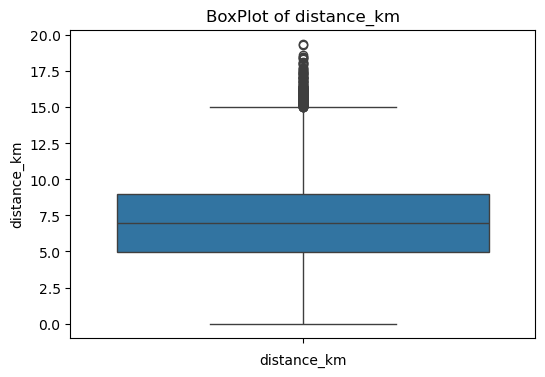

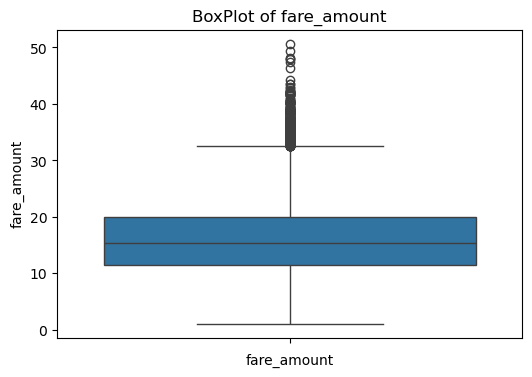

In [20]:
cols = ['distance_km','fare_amount']     #for_outliers

for col in cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"BoxPlot of {col}")
    plt.xlabel(col)
    plt.show

In [21]:
#removing_outliers_from_distance_km
Q1= df['distance_km'].quantile(0.25)
Q3= df['distance_km'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df=df[(df['distance_km'] >= lower_bound) & (df['distance_km'] <= upper_bound)]

In [22]:
#removing_outliers_from_fare_amount
Q1= df['fare_amount'].quantile(0.25)
Q3= df['fare_amount'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df=df[(df['fare_amount'] >= lower_bound) & (df['fare_amount'] <= upper_bound)]


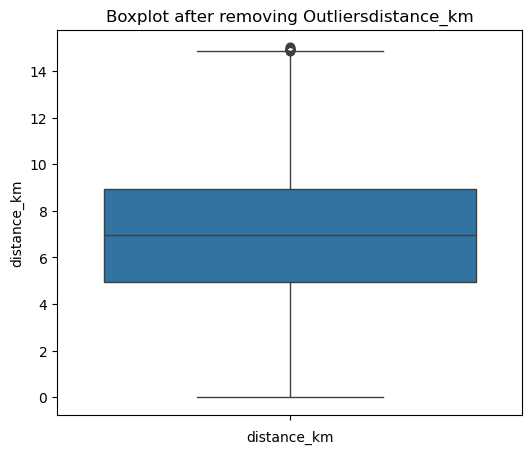

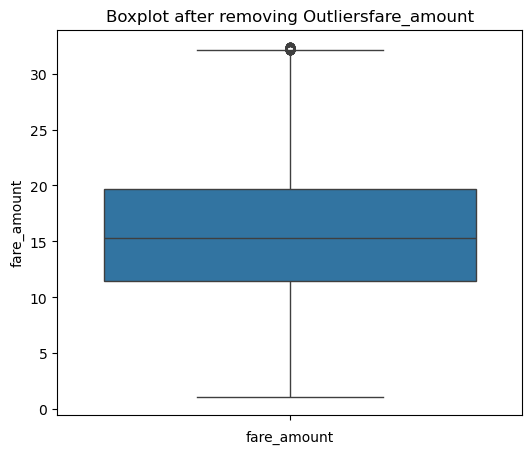

In [23]:
#after_removal
for col in cols:
    plt.figure(figsize=(6,5))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot after removing Outliers{col}")
    plt.xlabel(col)

In [24]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [25]:
X = df.drop(columns=['status'])
y= df['status']

In [26]:
X.head()

,trip_id,driver_id,rider_id,city,pickup_lat,pickup_lng,drop_lat,drop_lng,distance_km,fare_amount,...,pickup_hour,pickup_minute,pickup_day,pickup_month,pickup_year,drop_hour,drop_minute,drop_day,drop_month,drop_year
0,1,8270,10683,San Francisco,37.170931,-77.586479,37.173652,-77.619934,2.97,10.71,...,0,0,6,1,2023,0,8,1,1,2023
1,2,1860,44743,Boston,38.898127,-108.582977,38.937464,-108.558727,8.43,22.41,...,0,1,6,1,2023,0,26,1,1,2023
2,3,6390,75839,San Francisco,38.814571,-89.942603,38.821702,-89.896435,5.46,12.91,...,0,2,6,1,2023,0,18,1,1,2023
3,4,6191,22189,New York,37.295906,-75.328844,37.301375,-75.317488,6.61,15.70,...,0,3,6,1,2023,0,22,1,1,2023
4,5,6734,61104,Seattle,38.972395,-121.482913,38.992088,-121.467904,10.50,19.15,...,0,4,6,1,2023,0,35,1,1,2023


In [27]:
y.value_counts()

status
Completed    42015
Cancelled     4930
No-Show       2446
Name: count, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40, stratify=y)
print("Train and Test size Shape:",X_train.shape, X_test.shape)
print("Test size shapes:",y_train.shape, y_test.shape)

Train and Test size Shape: (39512, 21) (9879, 21)
Test size shapes: (39512,) (9879,)


In [134]:
Num_features = X.select_dtypes(include='number').columns.tolist()
Cat_features = X.select_dtypes(include='object').columns.tolist()

In [135]:
Num_features

['trip_id',
 'driver_id',
 'rider_id',
 'pickup_lat',
 'pickup_lng',
 'drop_lat',
 'drop_lng',
 'distance_km',
 'fare_amount',
 'pickup_hour',
 'pickup_minute',
 'pickup_day',
 'pickup_month',
 'pickup_year',
 'drop_hour',
 'drop_minute',
 'drop_day',
 'drop_month',
 'drop_year']

In [136]:
Cat_features

['city', 'payment_method']

In [137]:
num_pipe = Pipeline(steps=[
    ('Impute', SimpleImputer(strategy='mean')),
    ('Scaler', StandardScaler()),
    
])

In [138]:
cat_pipe = Pipeline(steps=[
    ('OnehotEncoder', OneHotEncoder(handle_unknown='ignore')),
    ('Impute', SimpleImputer(strategy='most_frequent')),
    
])

In [139]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipe , Num_features),
    ('cat', cat_pipe , Cat_features),
], remainder="drop")

In [140]:
X_train_prepared= preprocessor.fit_transform(X_train)
X_test_prepared= preprocessor.transform(X_test)

In [141]:
pd.DataFrame(X_train_prepared, columns=preprocessor.get_feature_names_out())

,num__trip_id,num__driver_id,num__rider_id,num__pickup_lat,num__pickup_lng,num__drop_lat,num__drop_lng,num__distance_km,num__fare_amount,num__pickup_hour,...,cat__city_Boston,cat__city_Chicago,cat__city_Los Angeles,cat__city_New York,cat__city_San Francisco,cat__city_Seattle,cat__payment_method_Card,cat__payment_method_Cash,cat__payment_method_UPI,cat__payment_method_Wallet
0,1.466703,-1.102315,1.343702,1.013375,-1.267868,1.024076,-1.269633,0.038065,0.581356,-1.658737,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.894701,1.460705,0.765448,0.469731,1.266192,0.501584,1.263343,0.055618,0.713952,-0.353630,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.252800,1.250199,-1.627159,0.599855,-0.840180,0.559485,-0.841770,-0.632460,-0.890625,1.386513,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.561379,-0.804450,-0.154845,-1.482201,-1.237402,-1.497799,-1.240368,-0.888734,-0.998045,1.676537,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.284684,0.263859,-0.981507,-1.227049,-0.656166,-1.201097,-0.657000,-0.123423,-1.095394,-1.078690,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39507,0.548387,-1.411724,-1.090183,0.098531,-1.498331,0.126248,-1.497113,0.245190,0.052651,1.241501,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39508,0.776857,-0.317630,1.101390,-0.225497,1.234393,-0.189989,1.237216,0.726143,-0.259536,-1.223702,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
39509,1.336100,-1.154653,1.442734,1.597637,-1.000148,1.586963,-0.997044,1.143904,0.881795,0.806466,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39510,-0.288778,1.247505,-0.690162,1.599192,-0.156540,1.601846,-0.159519,-0.046189,0.614925,-0.063606,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [143]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    #"SVM": SVC(probability=True, random_state=42),     # probability=True to get predict_proba
    "NaiveBayes": GaussianNB()
}

In [144]:
scores=[]
for name,model in models.items():
    model.fit(X_train_prepared,y_train)
    y_pred= model.predict(X_test_prepared)
    score= accuracy_score(y_test, y_pred)
    scores.append([name,score])
    print(f"\n{name}:")
    print(f"Accuracy: {score:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    


LogisticRegression:
Accuracy: 0.8507
Classification Report:
              precision    recall  f1-score   support

   Cancelled       0.00      0.00      0.00       986
   Completed       0.85      1.00      0.92      8404
     No-Show       0.00      0.00      0.00       489

    accuracy                           0.85      9879
   macro avg       0.28      0.33      0.31      9879
weighted avg       0.72      0.85      0.78      9879

Confusion Matrix:
[[   0  986    0]
 [   0 8404    0]
 [   0  489    0]]

RandomForest:
Accuracy: 0.8507
Classification Report:
              precision    recall  f1-score   support

   Cancelled       0.00      0.00      0.00       986
   Completed       0.85      1.00      0.92      8404
     No-Show       0.00      0.00      0.00       489

    accuracy                           0.85      9879
   macro avg       0.28      0.33      0.31      9879
weighted avg       0.72      0.85      0.78      9879

Confusion Matrix:
[[   0  986    0]
 [   0 8404  

In [145]:
import pandas as pd
results= pd.DataFrame(scores, columns=['Model','Accuracy'])
print(results)

                Model  Accuracy
0  LogisticRegression  0.850693
1        RandomForest  0.850693
2        DecisionTree  0.713939
3          NaiveBayes  0.850693


In [146]:
data = [
    {
        "trip_id": 1,
        "driver_id": 8270,
        "rider_id": 10683,
        "city": "San Francisco",
        "pickup_lat": 37.17093115042939,
        "pickup_lng": -77.58647936979322,
        "drop_lat": 37.1736523397383,
        "drop_lng": -77.61993433646886,
        "distance_km": 2.97,
        "fare_amount": 10.71,
        "status": "Completed",
        "payment_method": "Wallet",
        "pickup_time": "2023-01-01 00:00:00",
        "drop_time": "2023-01-01 00:08:54.600000000"
    },
    {
        "trip_id": 2,
        "driver_id": 1860,
        "rider_id": 44743,
        "city": "Boston",
        "pickup_lat": 38.898127,
        "pickup_lng": -108.582977,
        "drop_lat": 38.937464,
        "drop_lng": -108.558727,
        "distance_km": 8.43,
        "fare_amount": 22.41,
        "status": "Completed",
        "payment_method": "UPI",
        "pickup_time": "2023-01-01 00:00:00",
        "drop_time": "2023-01-01 00:25:17.400000000"
    }
]

df = pd.DataFrame(data)

In [ ]:
new_data = df.copy()


In [152]:
new_data["pickup_time"] = pd.to_datetime(new_data["pickup_time"])
new_data["drop_time"] = pd.to_datetime(new_data["drop_time"])

new_data["pickup_hour"] = new_data["pickup_time"].dt.hour
new_data["pickup_minute"] = new_data["pickup_time"].dt.minute
new_data["pickup_year"] = new_data["pickup_time"].dt.year
new_data["pickup_weekday"] = new_data["pickup_time"].dt.weekday
new_data["pickup_day"] = new_data["pickup_time"].dt.day
new_data["pickup_month"] = new_data["pickup_time"].dt.month

new_data["drop_hour"] = new_data["drop_time"].dt.hour
new_data["drop_minute"] = new_data["drop_time"].dt.minute
new_data["drop_weekday"] = new_data["drop_time"].dt.weekday
new_data["drop_day"] = new_data["drop_time"].dt.day
new_data["drop_month"] = new_data["drop_time"].dt.month
new_data["drop_year"] = new_data["drop_time"].dt.year

new_data["trip_duration_min"] = (
    new_data["drop_time"] - new_data["pickup_time"]
).dt.total_seconds() / 60


In [157]:
pd.DataFrame(new_data)

,trip_id,driver_id,rider_id,city,pickup_lat,pickup_lng,drop_lat,drop_lng,distance_km,fare_amount,...,pickup_weekday,pickup_month,drop_hour,drop_minute,drop_weekday,drop_month,drop_year,trip_duration_min,pickup_day,drop_day
0,1,8270,10683,San Francisco,37.170931,-77.586479,37.173652,-77.619934,2.97,10.71,...,6,1,0,8,6,1,2023,8.91,1,1
1,2,1860,44743,Boston,38.898127,-108.582977,38.937464,-108.558727,8.43,22.41,...,6,1,0,25,6,1,2023,25.29,1,1


In [ ]:
prediction_cols = [
    "city", "pickup_lat", "pickup_lng","drop_lat", "drop_lng",
    "distance_km", "fare_amount", "payment_method",
    "pickup_hour", "pickup_weekday", "pickup_month", "pickup_minute",
    "drop_hour", "drop_minute", "drop_weekday", "drop_month", "drop_year",
    "trip_duration_min"
]

In [155]:
X_new = new_data[prediction_cols]
X_new_processed = preprocessor.transform(new_data)

In [158]:
pd.DataFrame(X_new_processed)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-1.733046,1.070480,-1.707441,-1.587212,1.404800,-1.584321,1.402451,-1.387239,-0.846986,-1.658737,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.732976,-1.396331,-0.393454,-0.090901,-0.781121,-0.056958,-0.779397,0.529549,1.116775,-1.658737,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [160]:
predicted_status = model.predict(X_new_processed)
print("Predicted Status:", predicted_status)

Predicted Status: ['Completed' 'Completed']
